In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
df = pd.read_csv("Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## replacing  blank with 0 as tenure with 0 and no total charges are recorded

In [19]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")



In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [35]:
df.isnull().sum().sum()

0

In [37]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [45]:
df.duplicated().sum()

0

In [49]:
df['customerID'].duplicated().sum()# har ek coloumn ka check kr sakte hain


0

In [53]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [132]:
df.head(40)
# df.tail(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


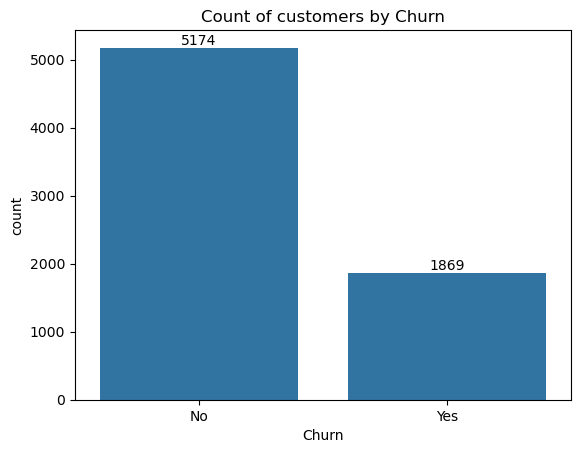

In [95]:
ax = sns.countplot(x ='Churn',data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

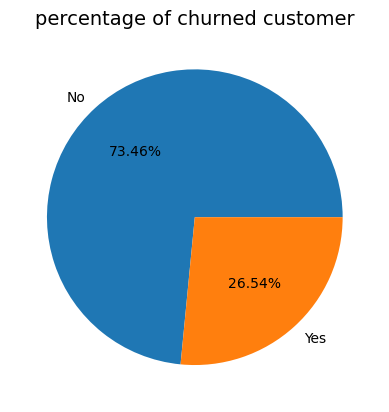

In [101]:
plt.figure(figure = (4,5))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels = gb.index,autopct = "%1.2f%%")
plt.title("percentage of churned customer",fontsize = 14)
plt.show()
# gb

## from the given pie char we can conclude that 26.54% of our customer have churned out. not lets explore the reason behind it

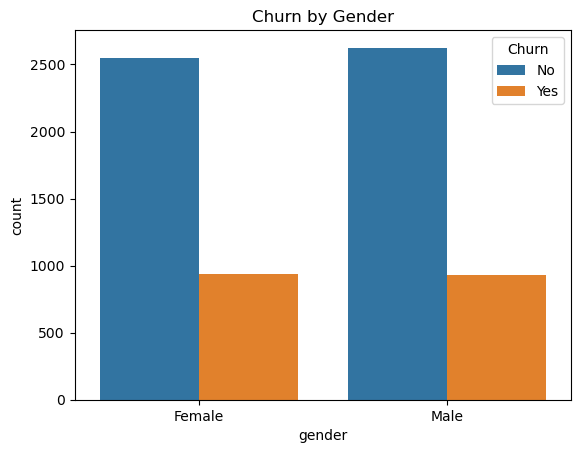

In [110]:
plt.figure(figure = (4,4))
sns.countplot(x="gender",data = df,hue = "Churn")
plt.title("Churn by Gender")
plt.show()

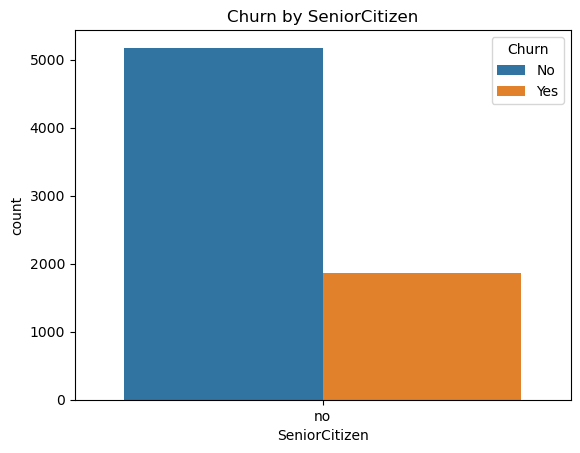

In [120]:
plt.figure(figure = (3,3))
sns.countplot(x="SeniorCitizen",data = df,hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

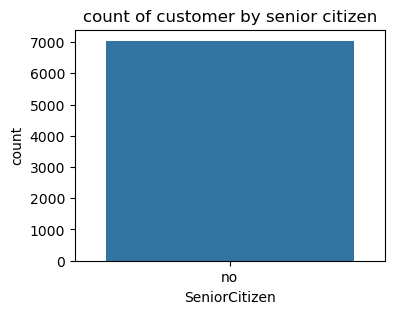

In [187]:
plt.figure(figsize = (4,3))
sns.countplot(x = "SeniorCitizen",data = df)
ax.bar_label(ax.containers[0])
plt.title("count of customer by senior citizen")
plt.show()

<Figure size 600x400 with 0 Axes>

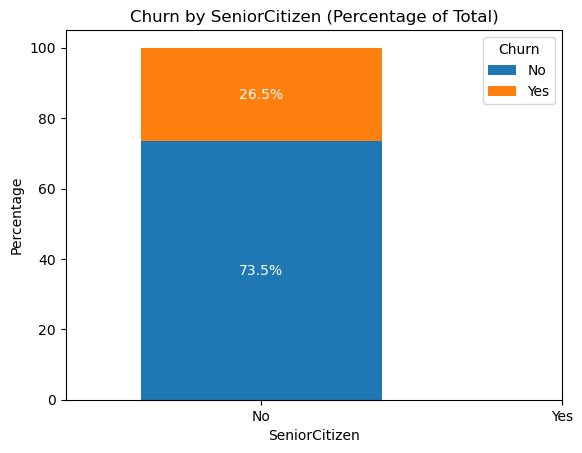

In [118]:
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
percent_data = count_data.divide(count_data.sum(axis=1), axis=0) * 100

# Plotting stacked bar chart
plt.figure(figsize=(6, 4))
percent_data.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], width=0.8)

# Adding percentage labels on the bars
for i in range(percent_data.shape[0]):
    total = 0
    for j, col in enumerate(percent_data.columns):
        percentage = percent_data.iloc[i, j]
        plt.text(i, total + percentage / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10, color='white')
        total += percentage

plt.title("Churn by SeniorCitizen (Percentage of Total)")
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen")
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

## Comparative a greater percentage of people in senior citizen category have churned

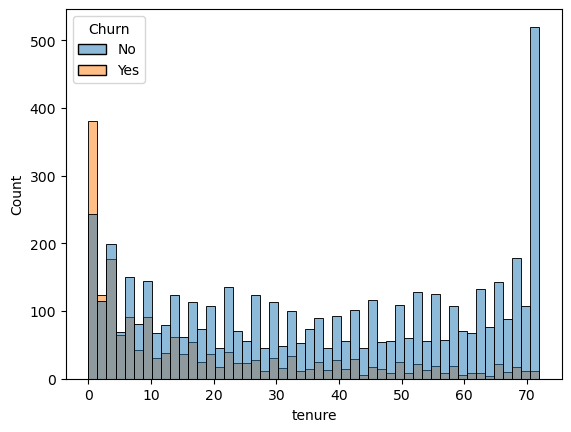

In [143]:
sns.histplot(x = 'tenure',data = df,bins = 50,hue = "Churn")
plt.show()

# people who have used our services for a long time stayed and people who used our services 1 or 2 months
# have churned

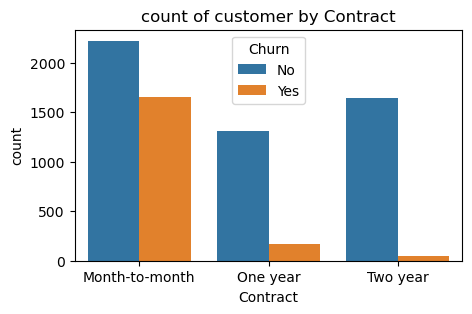

In [154]:
plt.figure(figsize = (5,3))
sns.countplot(x = "Contract",data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("count of customer by Contract")
plt.show()

# people who have month to month contract are likely to churn then those who have 1 or 2 years or contract.

In [161]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

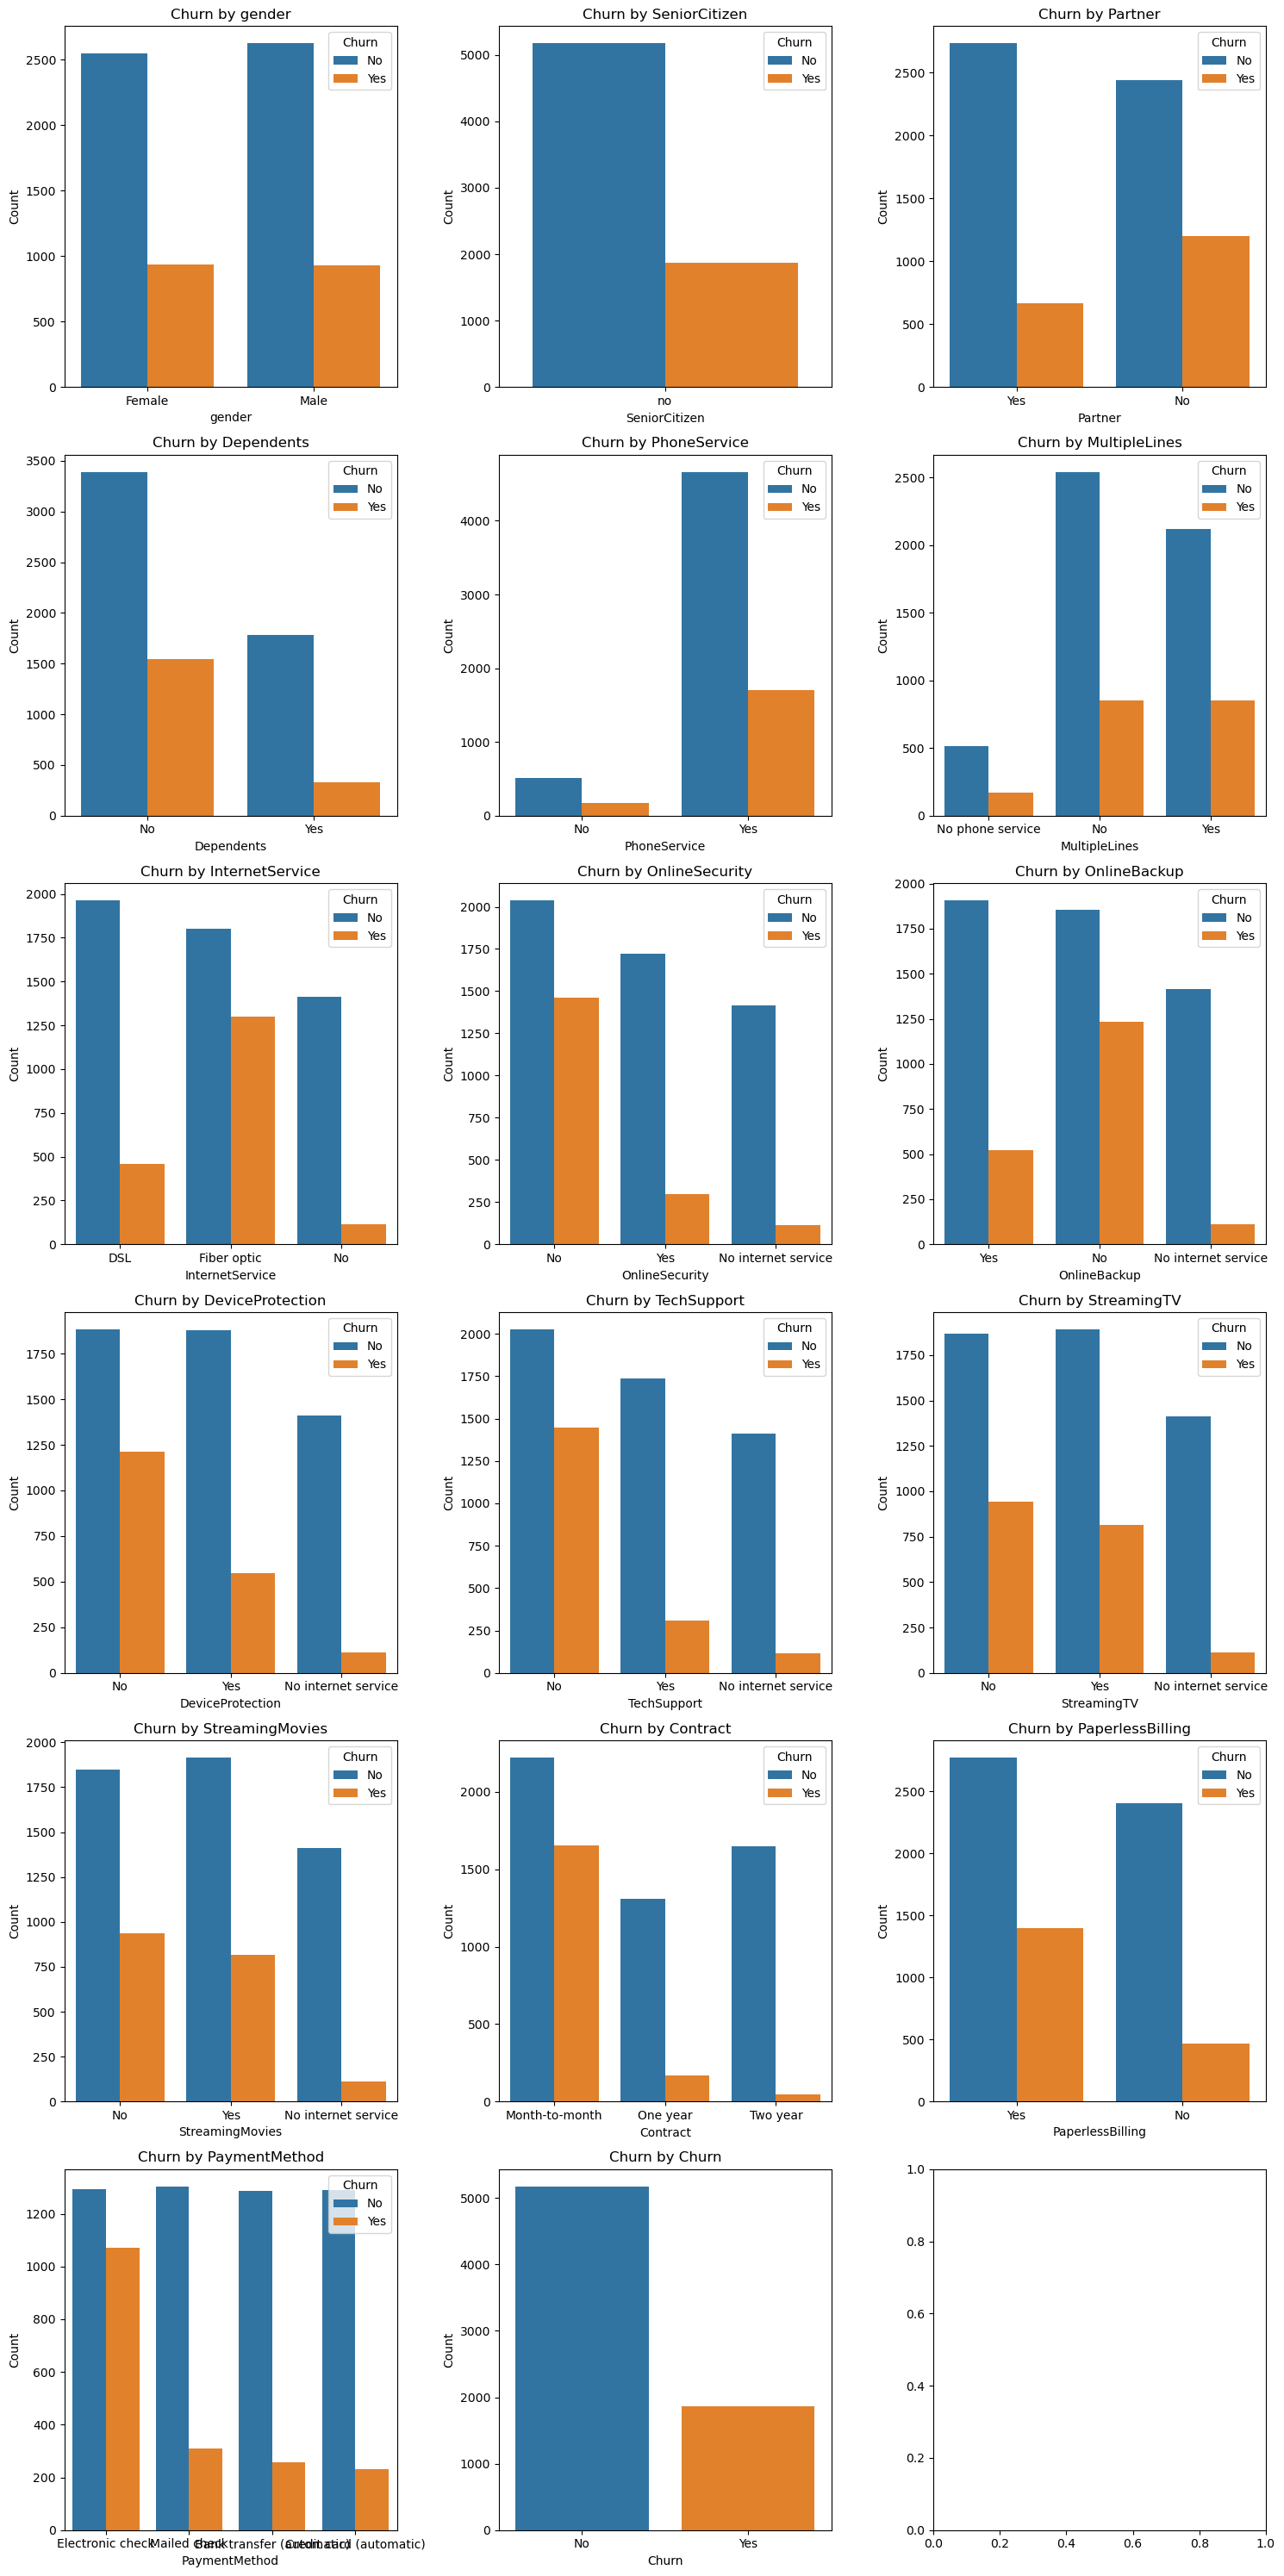

In [164]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# List of categorical columns
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Number of subplots needed
n = len(categorical_columns)

# Create a grid of subplots (you can adjust the layout as per your requirement)
fig, axes = plt.subplots(nrows=(n // 3) + 1, ncols=3, figsize=(15, 5 * ((n // 3) + 1)))

# Flatten axes to make it easier to iterate over
axes = axes.flatten()

# Loop through the categorical columns and plot each countplot
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df, ax=axes[i], hue='Churn')
    axes[i].set_title(f'Churn by {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


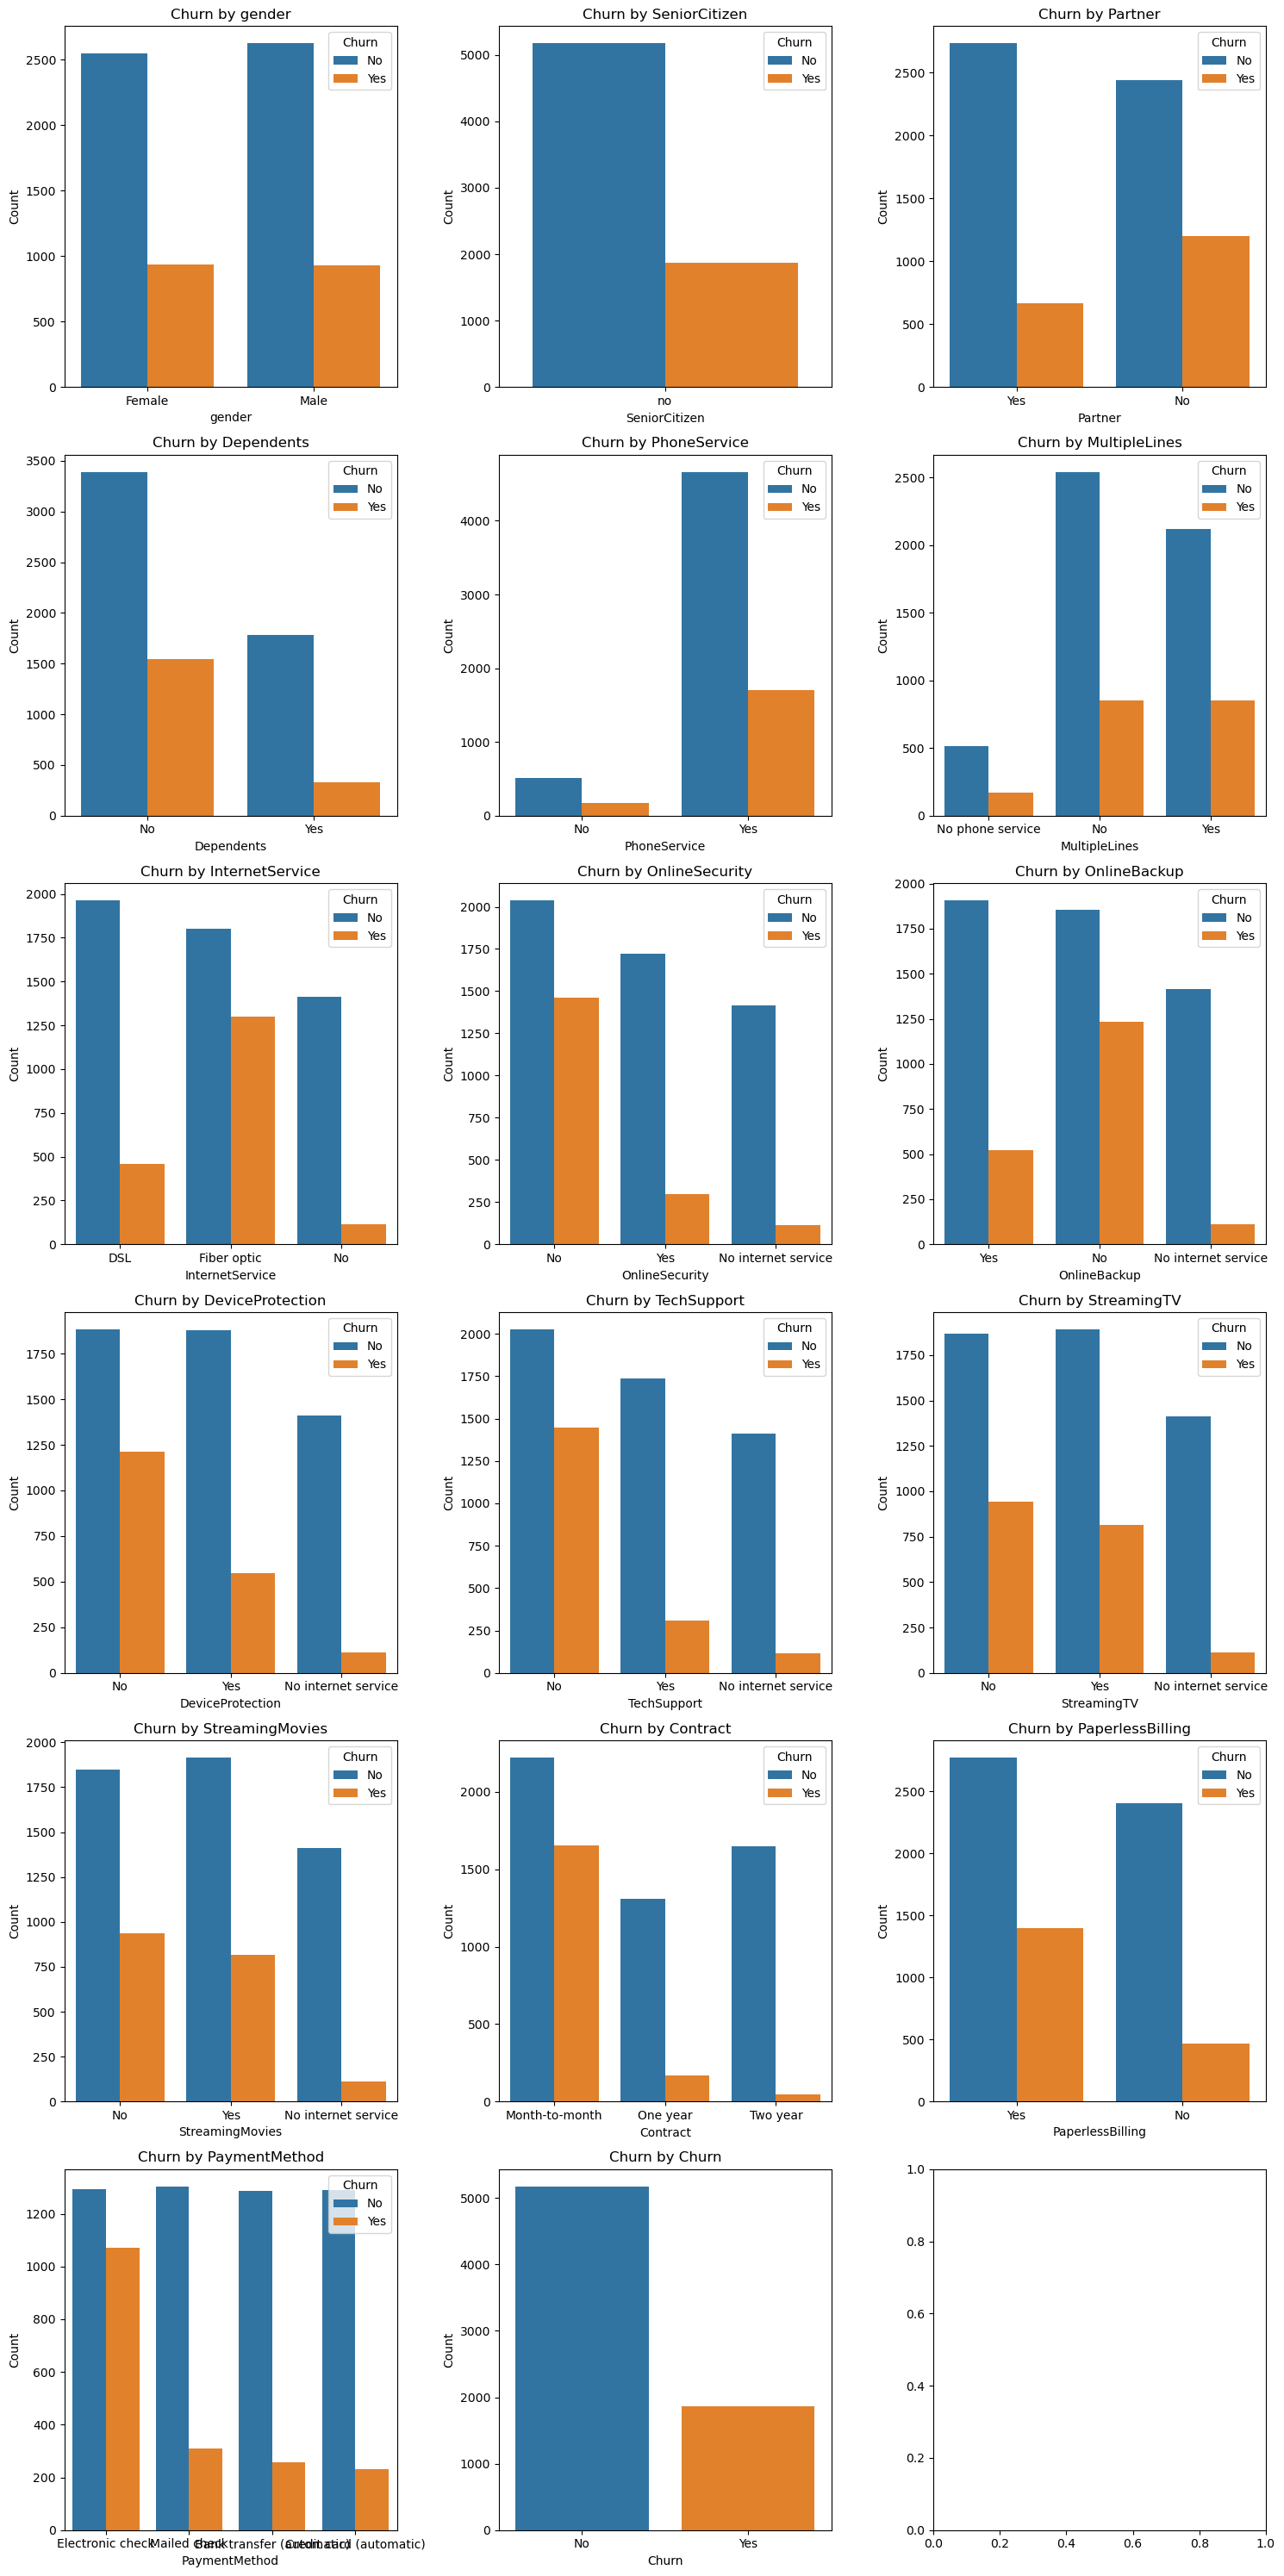

In [168]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# List of categorical columns
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Number of subplots needed
n = len(categorical_columns)

# Create a grid of subplots (you can adjust the layout as per your requirement)
fig, axes = plt.subplots(nrows=(n // 3) + 1, ncols=3, figsize=(15, 5 * ((n // 3) + 1)))

# Flatten axes to make it easier to iterate over
axes = axes.flatten()

# Loop through the categorical columns and plot each countplot
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df, ax=axes[i], hue=df["Churn"])
    axes[i].set_title(f'Churn by {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


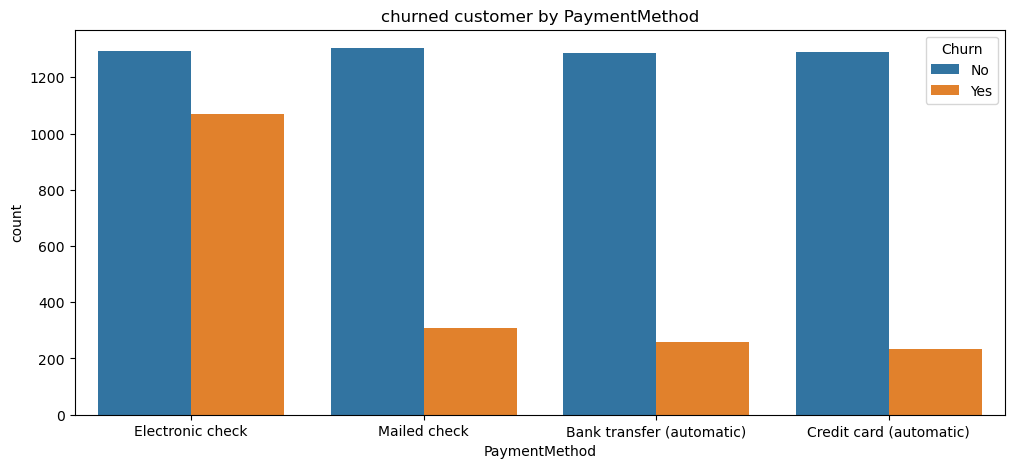

In [184]:
plt.figure(figsize = (12,5))
sns.countplot(x = "PaymentMethod",data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("churned customer by PaymentMethod")
plt.show()

# customer is likely to churned when he is using electronic check as a payment